In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100
square_footage = np.random.randint(800, 3500, num_samples)  # Range of house sizes
num_bedrooms = np.random.randint(1, 6, num_samples)  # Between 1 and 5 bedrooms
location_index = np.random.randint(1, 10, num_samples)  # Neighborhood desirability (1-10)

# Generate house prices using a formula
house_prices = (square_footage * 150) + (num_bedrooms * 10000) + (location_index * 5000) + np.random.randint(5000, 20000, num_samples)

# Create DataFrame
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Number of Bedrooms': num_bedrooms,
    'Location Index': location_index,
    'Price': house_prices
})

# Display first few rows
print(data.head())


   Square Footage  Number of Bedrooms  Location Index   Price
0            1660                   5               8  351679
1            2094                   2               1  352308
2            1930                   2               6  351839
3            1895                   1               8  348685
4            2438                   4               5  437905


In [3]:
# Define features and target
X = data[['Square Footage', 'Number of Bedrooms', 'Location Index']]
y = data['Price']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (80, 3), Test data shape: (20, 3)


In [4]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 12637.397662525356
Coefficients: [ 150.61479156 9191.83665336 4960.68212799]


In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Display first few actual vs predicted values
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions_df.head())


    Actual Price  Predicted Price
83        351358    349810.614371
53        198196    194860.208948
70        261242    258269.036195
45        499159    501375.250133
44        187836    193501.278713


In [7]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 16348698.16
R² Score: 1.00


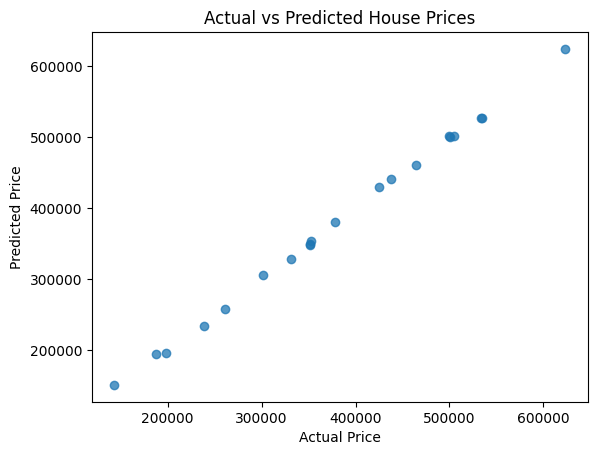

In [8]:
# Scatter plot for actual vs. predicted
plt.scatter(y_test, y_pred, alpha=0.75)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [6]:
# Function to predict house price for new input values
def predict_house_price(model):
    print("\nEnter details for house price prediction:")
    
    # Get user input
    square_footage = float(input("Square Footage: "))
    num_bedrooms = int(input("Number of Bedrooms (1-5): "))
    location_index = int(input("Location Index (1-10): "))
    
    # Create input array
    new_data = np.array([[square_footage, num_bedrooms, location_index]])
    
    # Make prediction
    predicted_price = model.predict(new_data)
    
    print(f"\nPredicted House Price: ${predicted_price[0]:,.2f}")

# Call function to predict house price for user input
predict_house_price(model)


Enter details for house price prediction:


Square Footage:  4000
Number of Bedrooms (1-5):  4
Location Index (1-10):  9



Predicted House Price: $696,510.05


c:\Users\srira\OneDrive\Desktop\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
